# KNN considerando Validación

En este curso vimos regresión logística y redes neuronales, sin embargo hay muchos otros modelos como árboles de decisión, K-vecinos cercanos (KNN) y modelos de ensambles entre muchos otros. En este ejercicio probaremos KNN como un clasificador haremos una evaluación del modelo además de ajustar *hiperparámetros*.

In [1]:
from __future__ import print_function, division

%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

In [2]:
!pip install sklearn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


## Validación de modelos

Una parte muy importante del aprendizaje automático es la **validación del modelo**: es decir, verificar qué tan bien se ajusta su modelo a un conjunto de datos dado. Considere un dataset de dígitos, la pregunta es: ¿Cómo podríamos comprobar qué tan bien nuestro modelo se ajusta a los datos?


In [3]:
from sklearn.datasets import load_digits #base de datos MNIST
digits = load_digits()
X = digits.data
y = digits.target
print(X)
print(type(X))
print(y)
print(X.shape)
print(y.shape)
print(np.max(X))

[[ 0.  0.  5. ...  0.  0.  0.]
 [ 0.  0.  0. ... 10.  0.  0.]
 [ 0.  0.  0. ... 16.  9.  0.]
 ...
 [ 0.  0.  1. ...  6.  0.  0.]
 [ 0.  0.  2. ... 12.  0.  0.]
 [ 0.  0. 10. ... 12.  1.  0.]]
<class 'numpy.ndarray'>
[0 1 2 ... 8 9 8]
(1797, 64)
(1797,)
16.0


<Figure size 432x288 with 0 Axes>

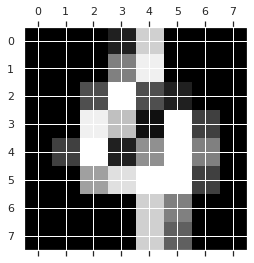

4


In [7]:
plt.gray() #doctest: +SKIP  
plt.matshow(digits.images[100]) #doctest: +SKIP  
plt.show() #doctest: +SKIP  
print(digits.target[100])

Ajustemos un clasificador de K vecinos cercanos.

In [8]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=1) #1NN 
knn.fit(X, y)

KNeighborsClassifier(n_neighbors=1)

Usaremos este clasificador para *predecir* etiquetas de datos.

In [9]:
y_pred = knn.predict(X)

Ahora podemos chequear que tan bien lo hicimos:

In [10]:
print("{0} / {1} correct".format(np.sum(y == y_pred), len(y)))

1797 / 1797 correct


El mejor resultado posible!.. ¿pero observan algo?


## Set de Validación

Arriba cometimos el error de probar nuestros datos en el mismo conjunto de datos que se utilizó para el entrenamiento. **Esto generalmente no es una buena idea**. Si optimizamos nuestro estimador de esta manera, tendremos a **sobreajustar** los datos: es decir, aprendemos el ruido.

Una mejor manera de probar un modelo es usar un conjunto de prueba (o test) que no ingrese al entrenamiento. Para ellos usaremos función de scikit-learn:


In [11]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33) #Hold-out
X_train.shape, X_test.shape

((1203, 64), (594, 64))

Ahora usaremos ambos sets de datos (entrenamiento y testeo).

In [12]:
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
print(y_pred)
print("{0} / {1} correct".format(np.sum(y_test == y_pred), len(y_test)))
print(np.sum(y_test == y_pred)/len(y_test))

[0 7 0 7 6 0 1 4 6 1 2 4 7 4 2 9 7 0 0 5 6 8 3 5 4 6 9 4 3 9 5 0 8 4 3 5 2
 7 2 5 0 5 5 8 5 6 2 0 4 1 5 4 3 4 5 5 1 5 5 3 7 9 2 2 9 2 7 7 0 1 5 0 5 5
 9 9 7 6 8 9 5 1 8 9 7 0 7 0 9 9 8 6 1 8 4 3 4 9 8 2 9 8 6 7 8 9 1 7 0 9 5
 2 6 3 8 3 4 6 4 6 5 4 8 6 7 1 5 8 4 2 7 7 1 4 9 2 5 0 9 8 9 7 0 5 9 0 4 2
 5 3 3 6 7 2 3 2 3 6 4 9 0 2 0 4 5 5 8 4 5 8 8 2 4 1 2 3 6 0 8 9 1 3 6 9 8
 9 6 4 2 7 8 2 5 4 1 2 8 2 8 4 5 1 1 8 8 4 9 6 9 4 7 1 1 0 9 4 6 8 7 4 1 4
 7 2 3 5 1 2 5 5 6 7 6 0 2 1 2 6 8 2 0 6 5 9 6 2 3 0 9 8 4 4 0 9 5 1 0 2 9
 3 5 2 3 0 5 8 1 0 3 2 6 8 5 8 6 2 1 3 1 8 0 8 1 0 7 0 0 8 8 7 0 8 1 3 5 7
 3 6 3 2 7 6 9 2 7 4 3 2 6 5 9 8 8 7 9 4 7 9 9 4 8 4 3 9 9 5 1 1 7 8 2 9 2
 0 4 9 0 1 6 3 3 0 6 8 3 1 0 1 4 1 3 1 3 7 5 8 0 1 6 4 9 8 4 3 2 3 3 2 6 8
 9 5 5 3 8 2 4 7 2 7 0 4 2 9 4 5 5 8 1 3 2 0 3 7 3 6 4 2 1 6 9 0 7 5 1 5 3
 0 8 9 3 7 0 7 1 0 3 6 5 6 1 2 8 3 1 3 0 5 4 4 1 0 9 6 3 7 5 9 9 0 7 2 3 4
 3 0 0 4 6 3 3 0 8 3 2 9 2 0 9 2 4 4 9 7 6 3 8 0 5 1 3 3 4 6 9 3 4 0 8 6 3
 6 9 2 0 2 0 0 7 8 6 0 5 

Esto nos da una estimación más confiable de cómo está funcionando nuestro modelo.

La métrica que estamos usando aquí, que compara el número de coincidencias con el número total de muestras, se conoce como **accuracy (puede ser traducida como precisión)**:

In [13]:
from sklearn.metrics import accuracy_score,classification_report
print(accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

0.9831649831649831
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        68
           1       0.94      1.00      0.97        49
           2       1.00      0.98      0.99        60
           3       0.98      1.00      0.99        64
           4       1.00      1.00      1.00        61
           5       0.98      0.97      0.98        62
           6       0.98      1.00      0.99        49
           7       1.00      0.98      0.99        58
           8       0.98      0.95      0.97        59
           9       0.95      0.95      0.95        64

    accuracy                           0.98       594
   macro avg       0.98      0.98      0.98       594
weighted avg       0.98      0.98      0.98       594



Otra forma es usando el método ``model.score``:

In [14]:
knn.score(X_test, y_test)

0.9831649831649831

Ahora variaremos el número de vecinos:

In [15]:
for n_neighbors in [1, 5, 10, 20, 30]:
    knn = KNeighborsClassifier(n_neighbors)
    knn.fit(X_train, y_train)
    print(n_neighbors, knn.score(X_test, y_test))

1 0.9831649831649831
5 0.9814814814814815
10 0.9730639730639731
20 0.9629629629629629
30 0.9494949494949495


#Validacion Cruzada

Un problema con los conjuntos de validación es que "pierdes" algunos de los datos. Arriba, solo hemos usado 3/4 de los datos para el entrenamiento y 1/4 para la validación. Por otro lado, en cierta medida dependemos del azar. Otra opción es utilizar la 2-validación cruzada (2-fold Cross-Validation), donde dividimos la muestra por la mitad y realizamos la validación dos veces:

In [16]:
X1, X2, y1, y2 = train_test_split(X, y, test_size=0.5, random_state=0)
X1.shape, X2.shape

((898, 64), (899, 64))

In [17]:
print(KNeighborsClassifier(1).fit(X2, y2).score(X1, y1))
print(KNeighborsClassifier(1).fit(X1, y1).score(X2, y2))

0.9832962138084632
0.982202447163515


Por lo tanto, una 2-validación cruzada nos da dos estimaciones de la puntuación de ese parámetro.
Debido a que esto es un poco complicado de hacer a mano, scikit-learn tiene una rutina de utilidad para ayudar:

In [22]:
#from sklearn.cross_validation import cross_val_score #desfasado 2022
from sklearn.model_selection import cross_val_score
cv_val = cross_val_score(KNeighborsClassifier(1), X, y, cv=2)
cv_val.mean()

0.9610455566813907

### K-fold Cross-Validation

Aquí hemos utilizado una validación cruzada doble. Esta es solo una especialización de $K$-fold cross-validation, en la que dividimos los datos en $K$ fragmentos y realizamos $K$ ajustes, donde cada fragmento recibe un turno como conjunto de validación.
Podemos hacer esto cambiando el parámetro ``cv`` anterior. Hagamos una validación cruzada de 10 veces:

In [26]:
cv_val=cross_val_score(KNeighborsClassifier(1), X, y, cv=10)
print(cv_val.mean())


0.9749627560521414


Esto nos da una idea aún mas fiable de qué tan bien está funcionando nuestro modelo.

## Overfitting, Underfitting y Selección de Modelo



Ahora que hemos repasado los conceptos básicos de la validación y la validación cruzada, es hora de profundizar aún más en la selección del modelo.
Los problemas asociados con la validación y la validación cruzada son algunos de los aspectos más importantes de la práctica del aprendizaje automático. Seleccionar el modelo óptimo para sus datos es vital y es una parte del problema que los profesionales del aprendizaje automático no suelen apreciar.
De importancia central es la siguiente pregunta:
Si nuestro estimador tiene un bajo rendimiento, ¿cómo debemos avanzar?
¿Usar un modelo más simple o más complicado?
¿Agregar más características a cada punto de datos observado?
¿Agregar más ejemplos de capacitación?
La respuesta es a menudo contraria a la intuición. En particular, a veces usar un modelo más complicado dará peores resultados. Además, a veces agregar datos de entrenamiento no mejorará sus resultados. La capacidad de determinar qué pasos mejorarán su modelo es lo que separa a los profesionales exitosos del aprendizaje automático de los que no lo tienen.

### Ilustración de la compensación entre sesgo y varianza

Para esta sección, trabajaremos con un problema de regresión 1D simple. Esto nos ayudará a visualizar fácilmente los datos y el modelo, y los resultados se pueden generalizar fácilmente a conjuntos de datos de mayor dimensión. Exploraremos un problema de regresión lineal simple. Esto se puede lograr dentro de scikit-learn con el módulo `sklearn.linear_model`.
Crearemos una función no lineal simple que nos gustaría ajustar

In [27]:
def test_func(x, err=0.5):
    y = 10 - 1. / (x + 0.1)
    if err > 0:
        y = np.random.normal(y, err)
    return y

Generemos algunos datos:

In [28]:
def make_data(N=40, error=1.0, random_seed=1):
    # randomly sample the data
    np.random.seed(1)
    X = np.random.random(N)[:, np.newaxis]
    y = test_func(X.ravel(), error)
    
    return X, y

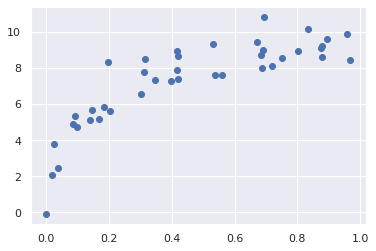

In [29]:
X, y = make_data(40, error=1)
plt.scatter(X.ravel(), y);

Ahora digamos que queremos realizar una regresión en estos datos. Usemos la función de regresión lineal incorporada para calcular un ajuste:

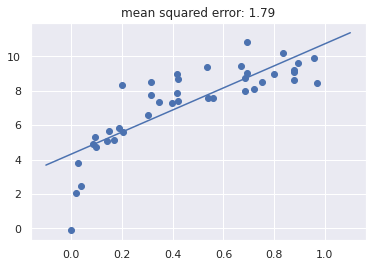

In [30]:
X_test = np.linspace(-0.1, 1.1, 500)[:, None]

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
model = LinearRegression()
model.fit(X, y)
y_test = model.predict(X_test)

plt.scatter(X.ravel(), y)
plt.plot(X_test.ravel(), y_test)
plt.title("mean squared error: {0:.3g}".format(mean_squared_error(model.predict(X), y)));

Hemos ajustado una línea recta a los datos, pero claramente este modelo no es una buena elección. Decimos que este modelo está **sesgado** o que **no se ajusta** a los datos.

Intentemos mejorar esto creando un modelo más complicado. Podemos hacer esto agregando grados de libertad y calculando una regresión polinomial sobre las entradas. Scikit-learn lo hace fácil con el preprocesador ``PolynomialFeatures``, que puede canalizarse con una regresión lineal.

Hagamos una rutina conveniente para hacer esto:

In [31]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline

def PolynomialRegression(degree=2, **kwargs):
    return make_pipeline(PolynomialFeatures(degree),
                         LinearRegression(**kwargs))

Apliquemos una regresión cuadrática:

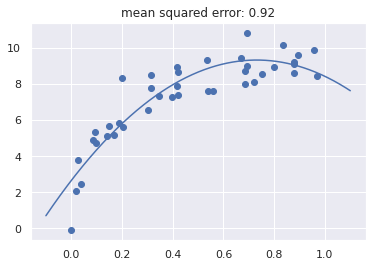

In [32]:
model = PolynomialRegression(2)
model.fit(X, y)
y_test = model.predict(X_test)

plt.scatter(X.ravel(), y)
plt.plot(X_test.ravel(), y_test)
plt.title("mean squared error: {0:.3g}".format(mean_squared_error(model.predict(X), y)));

Esto reduce el error cuadrático medio y hace un ajuste mucho mejor. ¿Qué sucede si usamos un polinomio de grado aún mayor?

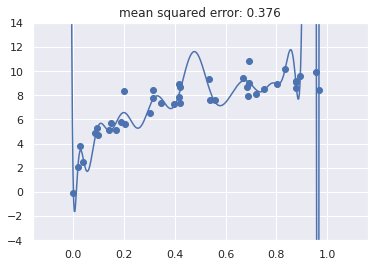

In [33]:
model = PolynomialRegression(30)
model.fit(X, y)
y_test = model.predict(X_test)

plt.scatter(X.ravel(), y)
plt.plot(X_test.ravel(), y_test)
plt.title("mean squared error: {0:.3g}".format(mean_squared_error(model.predict(X), y)))
plt.ylim(-4, 14);

Cuando aumentamos el grado hasta este punto, está claro que el ajuste resultante ya no refleja la verdadera distribución subyacente, sino que es más sensible al ruido en los datos de entrenamiento. Por esta razón, lo llamamos un **modelo de alta varianza** y decimos que **sobreajusta** los datos.

Solo por diversión, usemos la capacidad de interacción de IPython (solo en IPython 2.0+) para explorar esto de forma interactiva:

In [36]:
from IPython.html.widgets import interact

def plot_fit(degree=1, Npts=50):
    X, y = make_data(Npts, error=1)
    X_test = np.linspace(-0.1, 1.1, 500)[:, None]
    
    model = PolynomialRegression(degree=degree)
    model.fit(X, y)
    y_test = model.predict(X_test)

    plt.scatter(X.ravel(), y)
    plt.plot(X_test.ravel(), y_test)
    plt.ylim(-4, 14)
    plt.title("mean squared error: {0:.2f}".format(mean_squared_error(model.predict(X), y)))
    
interact(plot_fit, degree=[1, 2,30], Npts=[2, 20, 100]);

interactive(children=(Dropdown(description='degree', options=(1, 2, 30), value=1), Dropdown(description='Npts'…

In [46]:
import sklearn as sk
sorted(sk.metrics.SCORERS.keys())

['accuracy',
 'adjusted_mutual_info_score',
 'adjusted_rand_score',
 'average_precision',
 'balanced_accuracy',
 'completeness_score',
 'explained_variance',
 'f1',
 'f1_macro',
 'f1_micro',
 'f1_samples',
 'f1_weighted',
 'fowlkes_mallows_score',
 'homogeneity_score',
 'jaccard',
 'jaccard_macro',
 'jaccard_micro',
 'jaccard_samples',
 'jaccard_weighted',
 'max_error',
 'mutual_info_score',
 'neg_brier_score',
 'neg_log_loss',
 'neg_mean_absolute_error',
 'neg_mean_absolute_percentage_error',
 'neg_mean_gamma_deviance',
 'neg_mean_poisson_deviance',
 'neg_mean_squared_error',
 'neg_mean_squared_log_error',
 'neg_median_absolute_error',
 'neg_root_mean_squared_error',
 'normalized_mutual_info_score',
 'precision',
 'precision_macro',
 'precision_micro',
 'precision_samples',
 'precision_weighted',
 'r2',
 'rand_score',
 'recall',
 'recall_macro',
 'recall_micro',
 'recall_samples',
 'recall_weighted',
 'roc_auc',
 'roc_auc_ovo',
 'roc_auc_ovo_weighted',
 'roc_auc_ovr',
 'roc_auc_ovr_we